In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, plot_roc_curve, plot_confusion_matrix, \
    plot_precision_recall_curve
from sklearn.metrics import roc_curve, auc

from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.base import TransformerMixin
from sklearn.metrics import mean_squared_error


import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
warnings.simplefilter('ignore')
#https://www.kaggle.com/competitions/spaceship-titanic/data?select=test.csv

In [2]:
#https://www.kaggle.com/competitions/store-sales-time-series-forecasting/code STORE SALES
#Petals to the Metal - Flower Classification on TPU https://www.kaggle.com/competitions/tpu-getting-started

In [3]:
#https://www.kaggle.com/competitions/spaceship-titanic/data?select=test.csv

In [66]:
train = pd.read_csv(r'C:\Users\muvi_\Downloads\train (1).csv')

In [5]:
test = pd.read_csv(r'C:\Users\muvi_\Downloads\test.csv')

In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
train.shape

(8693, 14)

In [8]:
test.shape

(4277, 13)

In [9]:
test.shape[0] / (train.shape[0] + test.shape[0])

0.3297609868928296

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [12]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
train.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [14]:
train.shape

(8693, 14)

In [15]:
train.fillna(0, inplace=True)

In [16]:
train[train['Age'] == 0]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,0.0,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Ninaha Leeves,True
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,0.0,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Stald Hewson,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,9136_01,Earth,False,G/1471/S,TRAPPIST-1e,0.0,False,6.0,0.0,0.0,800.0,3.0,Sall Hestes,False
8584,9163_01,Earth,True,G/1477/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Idace Edwartizman,True
8650,9227_04,Earth,True,G/1498/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Robyny Hinglendez,True
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True


In [17]:
train.Age

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

In [18]:
train.Age.replace({0:28}, inplace=True)

<AxesSubplot:>

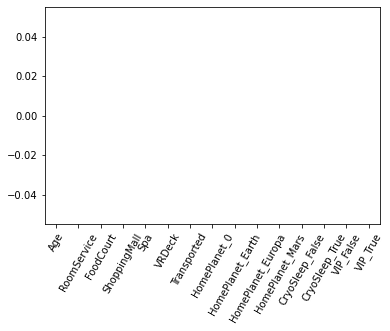

In [64]:
plt.xticks(rotation=60)
sns.barplot(y=train.isnull().sum().sort_values(ascending=False).values, x=train.columns)

In [57]:
train.isnull().sum().sort_values(ascending=False).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [21]:
train.drop(['Name', 'PassengerId'], axis=1, inplace=True)

In [22]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [23]:
train.drop(['Cabin', 'Destination'], axis=1, inplace=True)

In [24]:
train.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [25]:
train = pd.get_dummies(train)

In [26]:
train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_0,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0,1,0,1,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,1,0,0,1,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,0,1,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,0,1,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,0,0,1,0,1,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,1,1,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,0,1,0,0,1,0,1,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,0,0,1,0,1,0,1,0


In [27]:
X = train.drop('Transported', axis=1)
y = train.Transported

In [28]:
train_test_split?



In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [30]:
y_train.shape, y_test.shape, y.shape

((6085,), (2608,), (8693,))

In [31]:
RandomForestClassifier?


In [32]:
rdm_fr = RandomForestClassifier()

In [36]:
params = {'n_estimators':np.arange(10,100,15), 'max_depth': np.arange(3,10), 'min_samples_split': np.arange(2,20,4),
          'min_samples_leaf': np.arange(1,20, 4)}

In [37]:
grid_rdm = GridSearchCV(rdm_fr, params, n_jobs=-1, cv=5)

In [38]:
%timeit
grid_rdm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                         'min_samples_split': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': array([10, 25, 40, 55, 70, 85])})

In [50]:
best

RandomForestClassifier(max_depth=9, n_estimators=40)

In [39]:
best = grid_rdm.best_estimator_

In [40]:
features = best.feature_importances_
features

array([0.07180335, 0.11977932, 0.10380692, 0.07881508, 0.15171972,
       0.10828983, 0.00329886, 0.04975248, 0.03499651, 0.0155548 ,
       0.13398952, 0.12464796, 0.00180337, 0.0017423 ])

In [41]:
features_df = pd.DataFrame({'features': list(X_train), 'feature_importance': features})

In [42]:
features_df.sort_values('feature_importance', ascending=False)

,features,feature_importance
4,Spa,0.151720
10,CryoSleep_False,0.133990
11,CryoSleep_True,0.124648
1,RoomService,0.119779
5,VRDeck,0.108290
2,FoodCourt,0.103807
3,ShoppingMall,0.078815
0,Age,0.071803
7,HomePlanet_Earth,0.049752
8,HomePlanet_Europa,0.034997


In [43]:
best.score(X_test, y_test)

0.7818251533742331

In [44]:
y_pred = best.predict(X_test)

In [45]:
recall_score(y_test, y_pred)

0.7907505686125853

In [46]:
precision_score(y_test, y_pred)

0.780688622754491

In [47]:
y_predicted_prob = best.predict_proba(X_test)

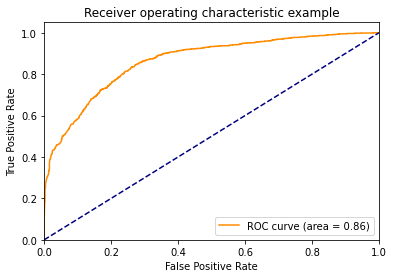

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [69]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [70]:
train.PassengerId

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [76]:
gggg_pp = [i.split('_') for i in train.PassengerId.values]

In [77]:
pp = [i[1] for i in gggg_pp]

In [81]:
pp = pd.Series(pp)

In [82]:
pp.value_counts()

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
dtype: int64

In [91]:
train['pp'] = pp

In [104]:
train.pp.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

Text(0, 0.5, 'Count of numbers in group')

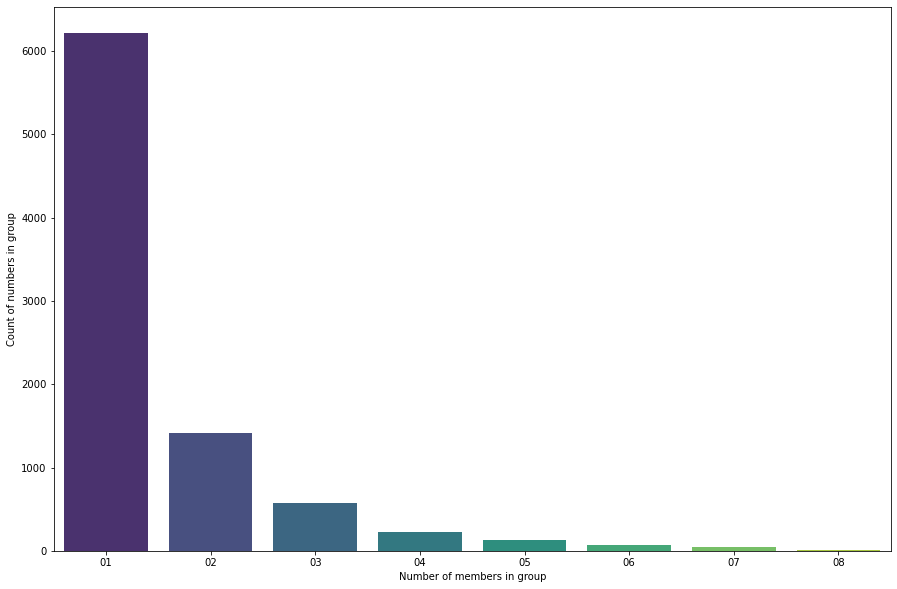

In [221]:
plt.subplots(figsize=(15, 10))
sns.barplot(x=train.pp.unique(), y=train.pp.value_counts(), palette='viridis')
plt.xlabel('Number of members in group')
plt.ylabel('Count of numbers in group')

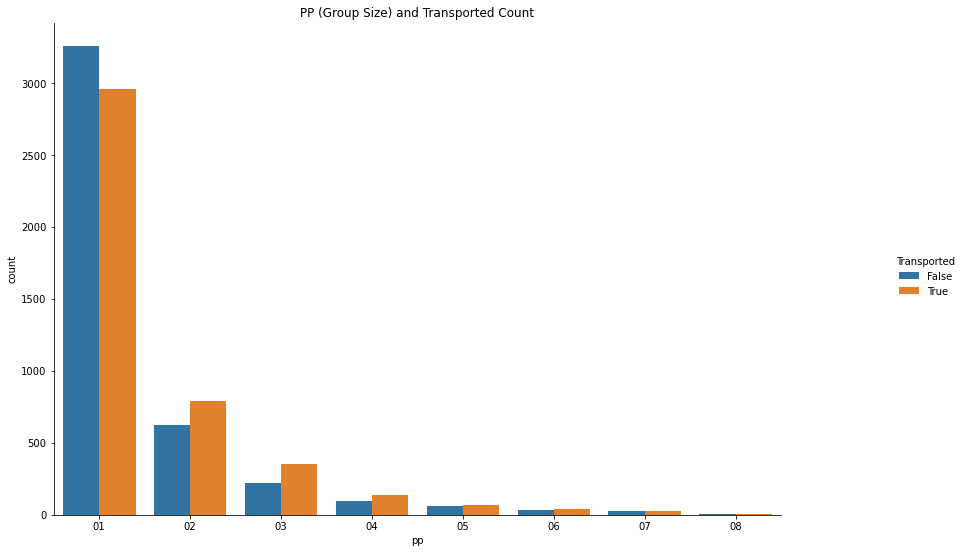

In [220]:
g = sns.catplot(x="pp",  kind="count", hue='Transported',
            data=train).set(title='PP (Group Size) and Transported Count')
g.fig.set_figheight(8)
g.fig.set_figwidth(15)

In [118]:
sns.catplot?

In [150]:
HomePlanet = train.HomePlanet.unique()[:-1]

Text(0, 0.5, 'Count of people')

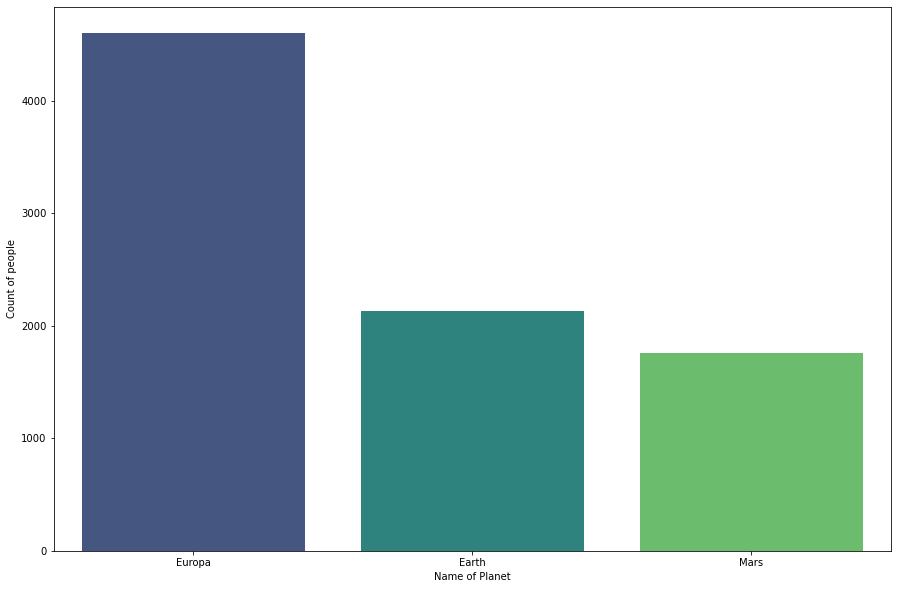

In [218]:
plt.subplots(figsize=(15,10))
sns.barplot(x=HomePlanet, y=train.HomePlanet.value_counts(), palette='viridis')
plt.xlabel('Name of Planet')
plt.ylabel('Count of people')

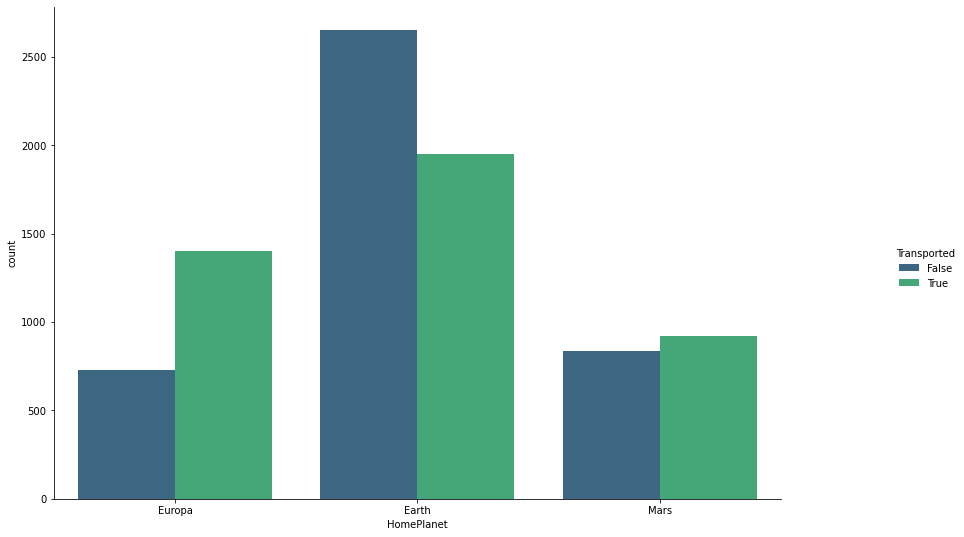

In [217]:
g = sns.catplot(kind='count', x='HomePlanet', hue='Transported', data=train, palette='viridis')
g.fig.set_figheight(8)
g.fig.set_figwidth(15)

In [179]:
CryoSleep = train.CryoSleep.unique()[:-1]

<AxesSubplot:ylabel='CryoSleep'>

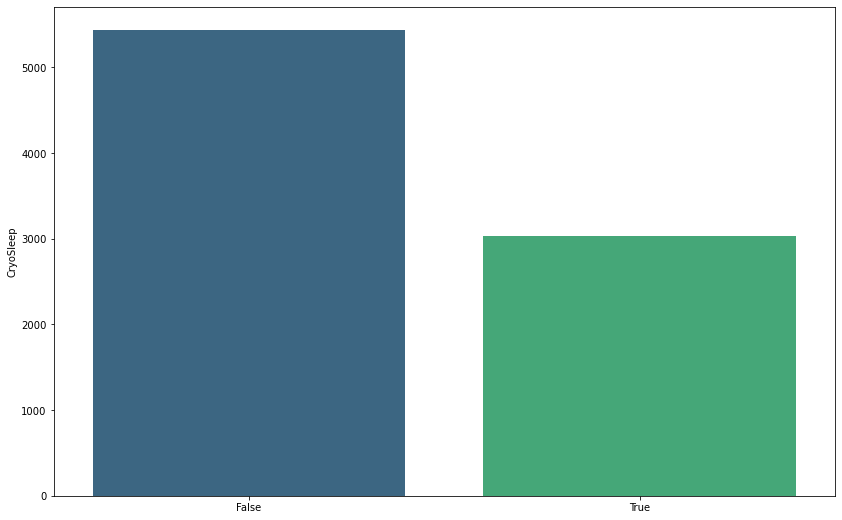

In [216]:
plt.subplots(figsize=(14,9))
sns.barplot(y=train.CryoSleep.value_counts(), x=CryoSleep, palette='viridis')

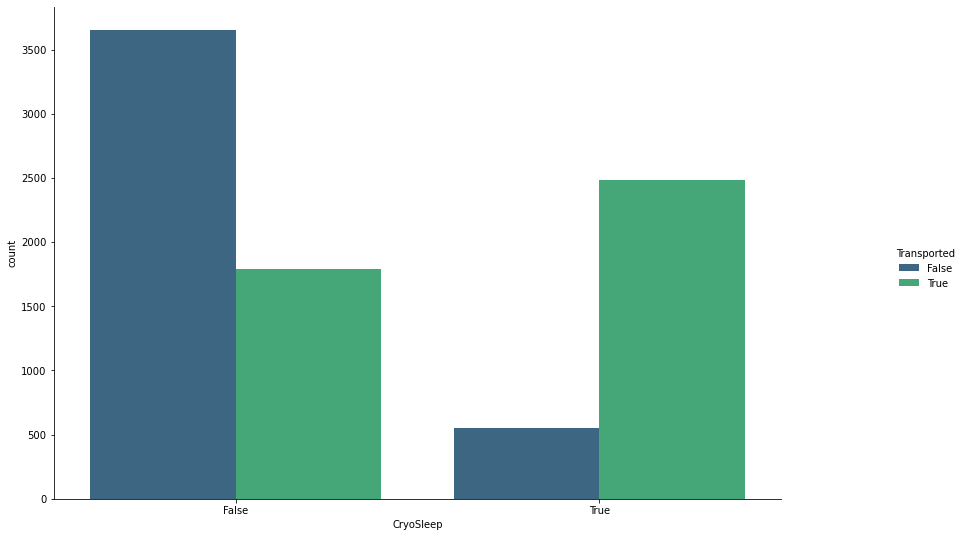

In [215]:
g = sns.catplot(kind='count', x='CryoSleep', hue='Transported', data=train, palette='viridis')
g.fig.set_figheight(8)
g.fig.set_figwidth(15)

In [193]:
train['Cabin'].fillna('N/N/N', inplace=True)

In [195]:
cabin = [i.split('/') for i in train.Cabin]

In [197]:
side = [i[-1] for i in cabin]

In [199]:
train['Side'] = side

In [208]:
train.Side.value_counts()

S    4288
P    4206
N     199
Name: Side, dtype: int64

Text(0, 0.5, 'Count of sides')

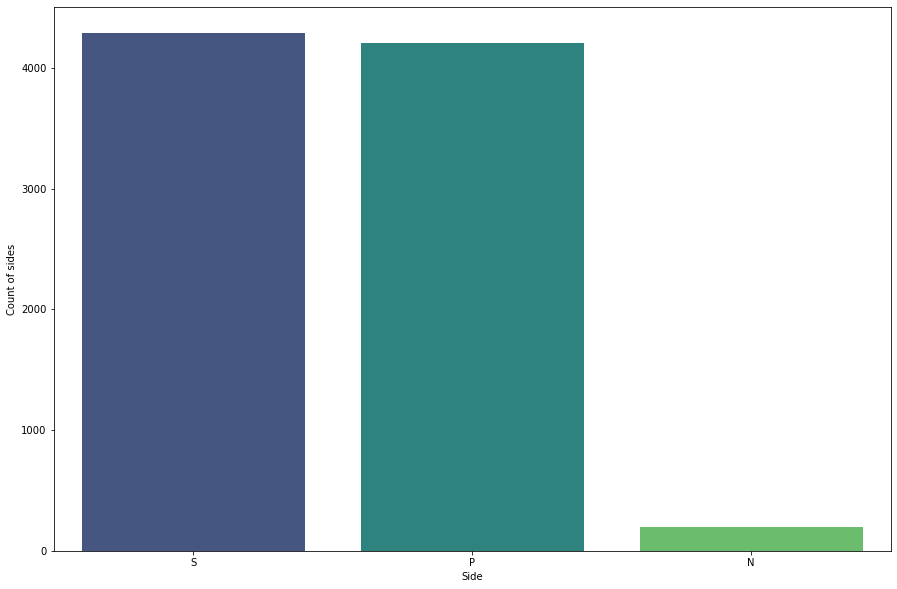

In [214]:
plt.subplots(figsize=(15,10))
sns.barplot(x=train.Side.value_counts().index, y=train.Side.value_counts(), palette='viridis')
plt.xlabel('Side')
plt.ylabel('Count of sides')

In [226]:
sns.catplot?

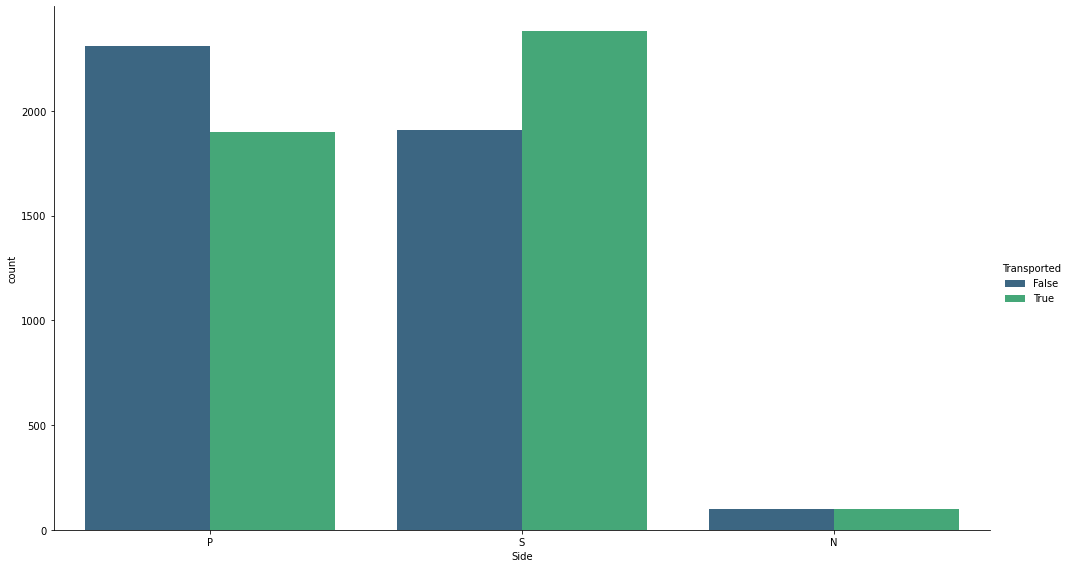

In [231]:
sns.catplot(kind='count', data=train, hue='Transported', x='Side', palette='viridis', height=8, aspect=1.75)

In [234]:
deck = [i[0] for i in cabin]

In [237]:
train['deck'] = deck

In [238]:
train.deck.unique()

array(['B', 'F', 'A', 'G', 'N', 'E', 'D', 'C', 'T'], dtype=object)

In [240]:
train.deck.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
N     199
T       5
Name: deck, dtype: int64

Text(0, 0.5, 'Count')

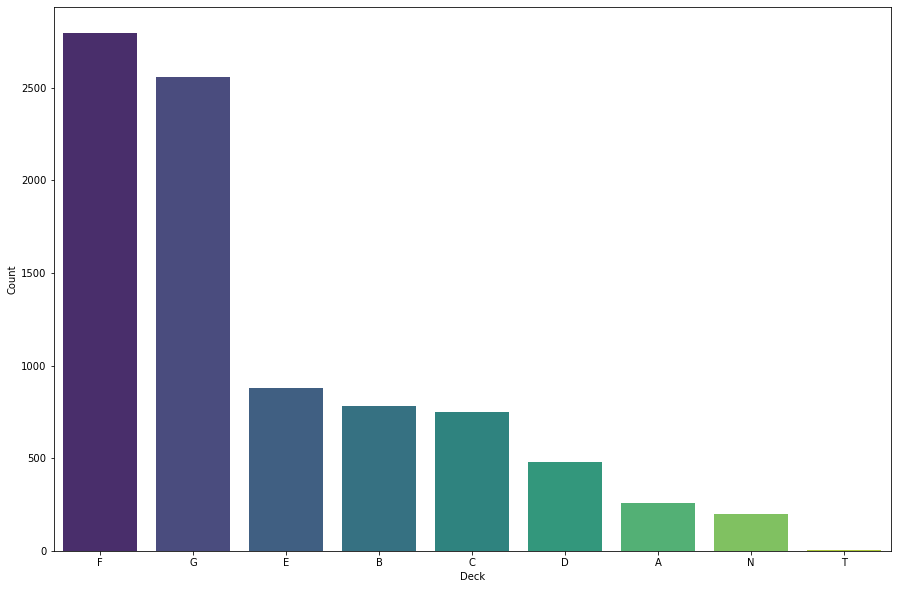

In [243]:
plt.subplots(figsize=(15,10))
sns.barplot(x=train.deck.value_counts().index, y=train.deck.value_counts(), palette='viridis')
plt.xlabel('Deck')
plt.ylabel('Count')

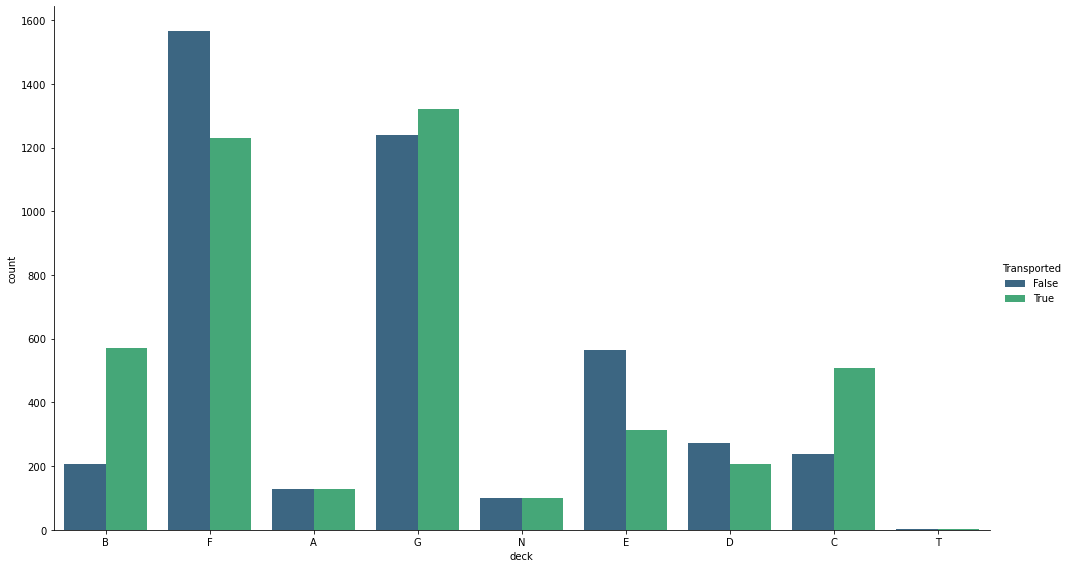

In [246]:
sns.catplot(kind='count', data=train, x='deck', hue='Transported', palette='viridis', height=8, aspect=1.75)

In [249]:
train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

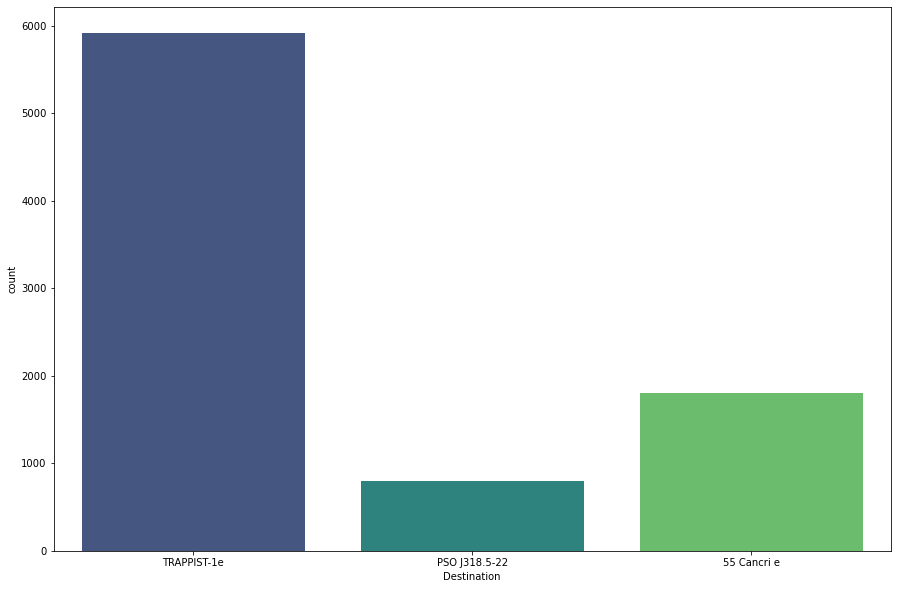

In [255]:
plt.subplots(figsize=(15,10))
sns.countplot(x='Destination', data=train, palette='viridis')

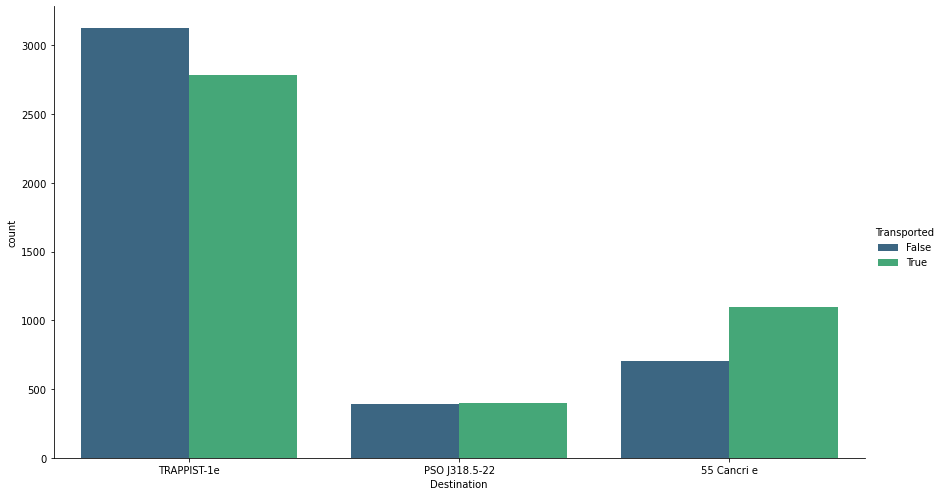

In [256]:
sns.catplot(x='Destination', data=train, hue='Transported', kind='count',palette='viridis', height=7, aspect=1.75)

In [263]:
sns.histplot?

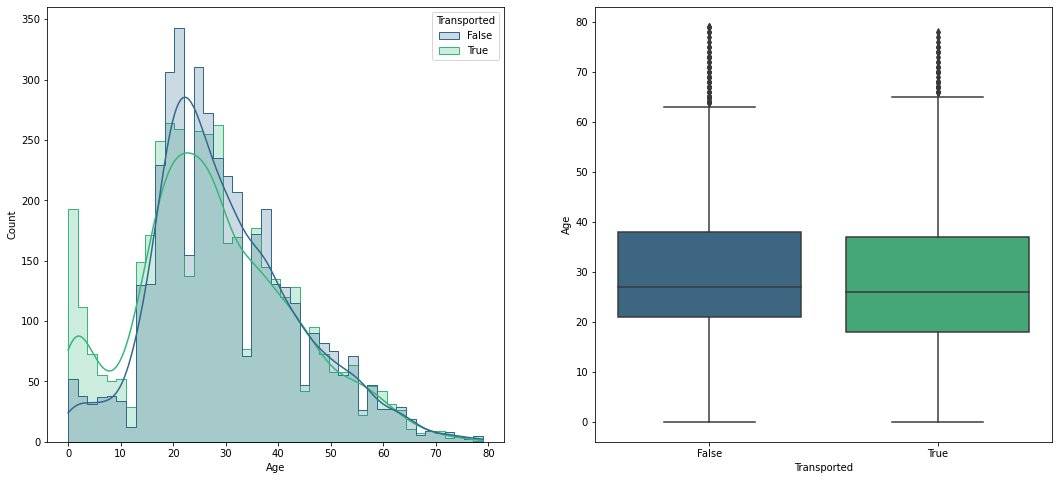

In [272]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.histplot(x='Age', data=train, palette='viridis', kde=True , hue='Transported', element='step', ax=ax[0])
sns.boxplot(y='Age', x='Transported', data=train, palette='viridis')
plt.show()

In [280]:
train.groupby('Transported', as_index=False).agg({'Age': 'describe'}).T

0          1
Transported            False       True
Age         count     4226.0     4288.0
            mean   29.922858  27.748834
            std    13.699262  15.151705
            min          0.0        0.0
            25%         21.0       18.0
            50%         27.0       26.0
            75%         38.0       37.0
            max         79.0       78.0

In [281]:
train.VIP

0       False
1       False
2        True
3       False
4       False
        ...  
8688     True
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 8693, dtype: object

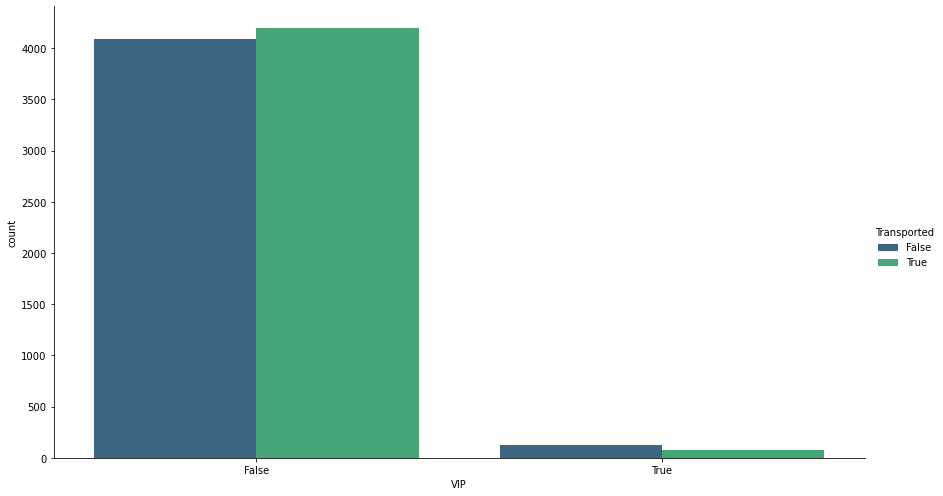

In [284]:
sns.catplot(data=train, x='VIP', kind='count', palette='viridis', hue='Transported', height=7, aspect=1.75);

In [ ]:
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

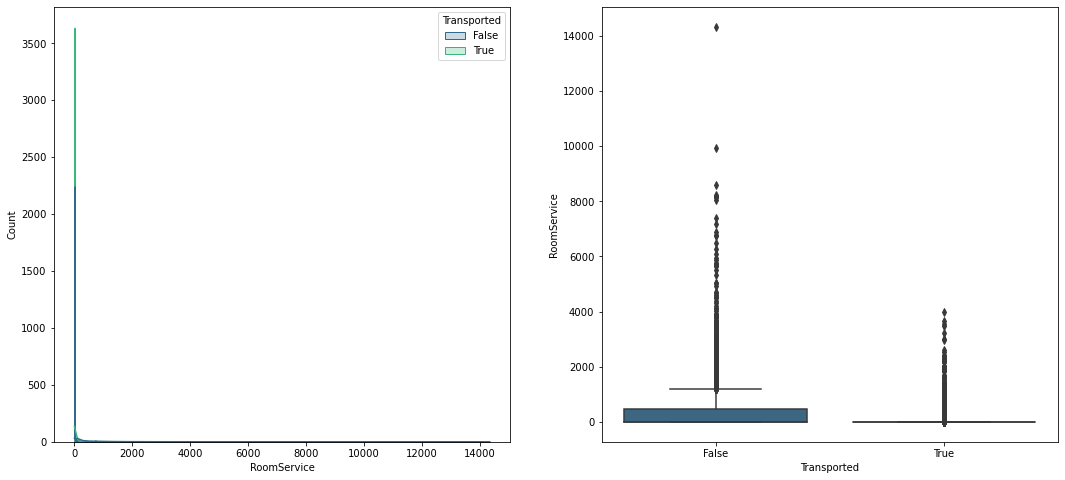

In [292]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.histplot(x='RoomService', data=train, kde=True, element='step', ax=ax[0], hue='Transported', palette='viridis')
sns.boxplot(x='Transported', y='RoomService', data=train, palette='viridis')

In [290]:
train.groupby('Transported', as_index=False).agg({'RoomService': 'describe'}).T

0           1
Transported             False        True
RoomService count      4217.0      4295.0
            mean   389.266066   63.098021
            std    875.638123  274.812497
            min           0.0         0.0
            25%           0.0         0.0
            50%           1.0         0.0
            75%         473.0         0.0
            max       14327.0      3992.0

<AxesSubplot:xlabel='Transported', ylabel='FoodCourt'>

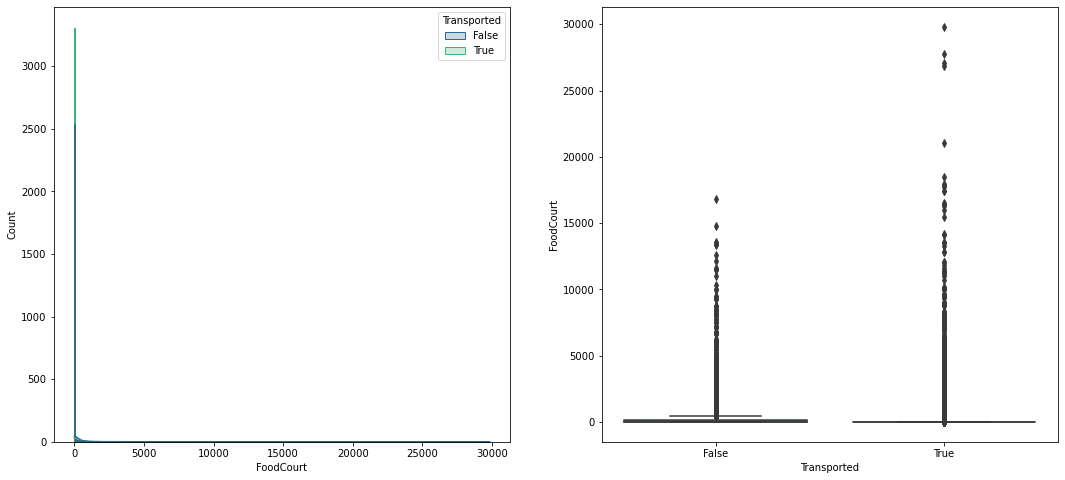

In [293]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.histplot(x='FoodCourt', data=train, kde=True, element='step', ax=ax[0], hue='Transported', palette='viridis')
sns.boxplot(x='Transported', y='FoodCourt', data=train, palette='viridis')

In [294]:
train.groupby('Transported', as_index=False).agg({'FoodCourt': 'describe'}).T

0            1
Transported              False         True
FoodCourt   count       4231.0       4279.0
            mean     382.61593   532.691984
            std    1200.115601  1931.306995
            min            0.0          0.0
            25%            0.0          0.0
            50%            0.0          0.0
            75%          179.0          0.0
            max        16856.0      29813.0

<AxesSubplot:xlabel='Transported', ylabel='ShoppingMall'>

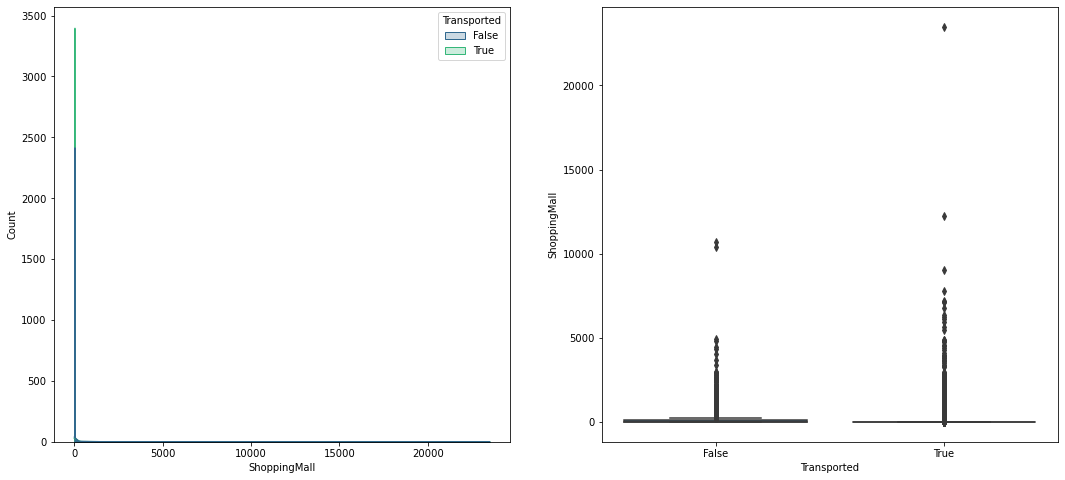

In [295]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.histplot(x='ShoppingMall', data=train, kde=True, element='step', ax=ax[0], hue='Transported', palette='viridis')
sns.boxplot(x='Transported', y='ShoppingMall', data=train, palette='viridis')

In [300]:
train.groupby('Transported', as_index=False).agg({'ShoppingMall': 'describe'}).T

0           1
Transported              False        True
ShoppingMall count      4221.0      4264.0
             mean   167.566217  179.829972
             std    456.528126  722.026714
             min           0.0         0.0
             25%           0.0         0.0
             50%           0.0         0.0
             75%          95.0         0.0
             max       10705.0     23492.0

<AxesSubplot:xlabel='Transported', ylabel='Spa'>

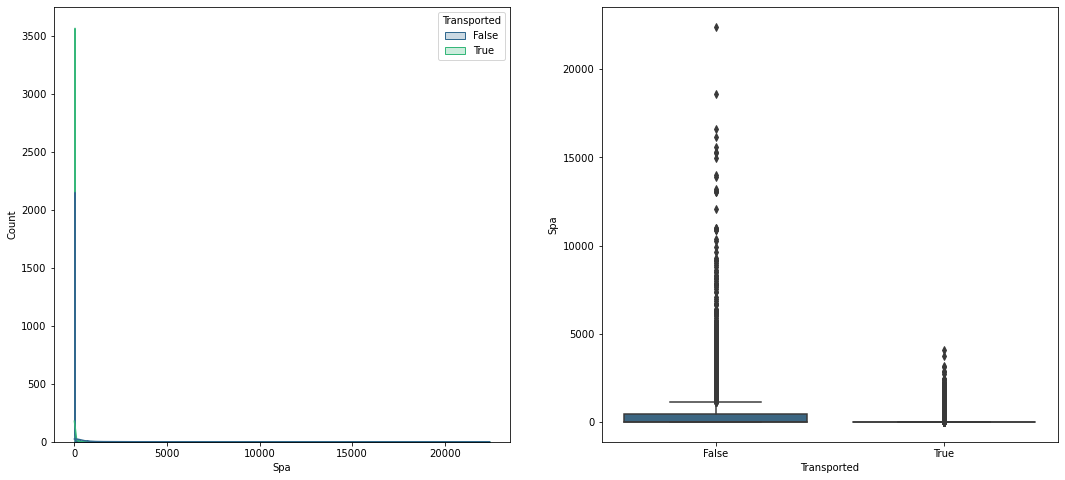

In [297]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.histplot(x='Spa', data=train, kde=True, element='step', ax=ax[0], hue='Transported', palette='viridis')
sns.boxplot(x='Transported', y='Spa', data=train, palette='viridis')

In [299]:
train.groupby('Transported', as_index=False).agg({'Spa': 'describe'}).T

0           1
Transported              False        True
Spa         count       4223.0      4287.0
            mean    564.382666   61.675531
            std    1551.356047  262.682871
            min            0.0         0.0
            25%            0.0         0.0
            50%            4.0         0.0
            75%          453.5         0.0
            max        22408.0      4103.0

<AxesSubplot:xlabel='Transported', ylabel='VRDeck'>

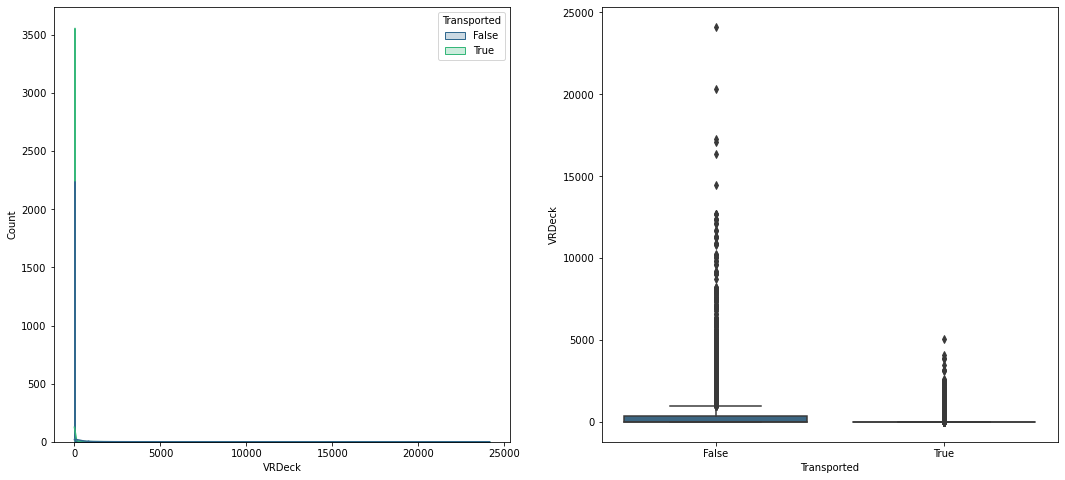

In [301]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.histplot(x='VRDeck', data=train, kde=True, element='step', ax=ax[0], hue='Transported', palette='viridis')
sns.boxplot(x='Transported', y='VRDeck', data=train, palette='viridis')

In [302]:
train.groupby('Transported', as_index=False).agg({'VRDeck': 'describe'}).T

0           1
Transported              False        True
VRDeck      count       4225.0      4280.0
            mean    543.629822   69.148131
            std    1563.088368  291.658171
            min            0.0         0.0
            25%            0.0         0.0
            50%            1.0         0.0
            75%          388.0         0.0
            max        24133.0      5063.0

In [308]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'pp', 'Side', 'deck'],
      dtype='object')

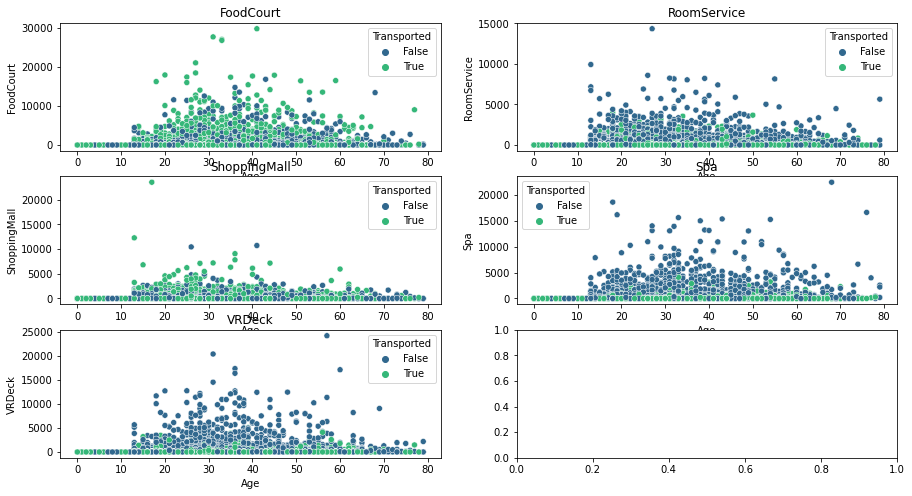

In [326]:
fig, ax = plt.subplots(3, 2, figsize=(15, 8))
list = ['FoodCourt', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck']
for i, a in enumerate(list):
    sns.scatterplot(x='Age', y=a, hue='Transported', data=train, palette='viridis', ax=fig.axes[i])
    fig.axes[i].set_title(a)

In [319]:
enumerate?

In [331]:
train['Amenities'] = train[AMENITIES].sum(axis=1)
train['NoAmenities'] = train['Amenities']==0

In [339]:
sns.heatmap?

<AxesSubplot:>

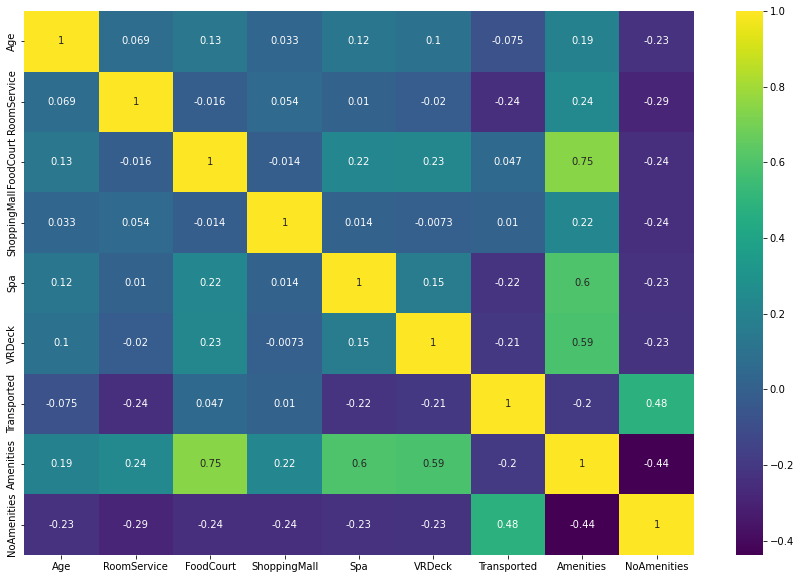

In [340]:
plt.subplots(figsize=(15, 10))
sns.heatmap(train.corr(), cmap='viridis', annot=True)

In [341]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'pp', 'Side', 'deck', 'Amenities',
       'NoAmenities'],
      dtype='object')

In [343]:
train.drop(['Name', 'PassengerId', 'Cabin'], axis=1, inplace=True)

In [365]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
pp                0
Side              0
deck              0
Amenities         0
NoAmenities       0
dtype: int64

In [361]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'pp',
       'Side', 'deck', 'Amenities', 'NoAmenities'],
      dtype='object')

In [384]:
for i in train.columns:
    if i in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
        train[i].fillna(train[i].median(), inplace=True)
    else:
        train[i].fillna(train[i].mode()[0], inplace=True)

In [385]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
pp              0
Side            0
deck            0
Amenities       0
NoAmenities     0
dtype: int64

## Encode labels and Scale
##### Objects will use scikit-learn's LabelEncoder
##### Booleans will be converted to int
##### Floats will be scaled with MinMaxScaler

In [394]:
LABELS = train.columns
for col in LABELS:
    # Check if object
    if train[col].dtype == 'O':
        encoder = LabelEncoder()
        train[col] = encoder.fit_transform(train[col])
        
    elif train[col].dtype == 'bool':
        train[col] = train[col].astype('int')

encoder = LabelEncoder()
train['Transported'] = train['Transported'].astype('int')
LABELS_SCALE = ['Age',]
scaler = MinMaxScaler()
train[LABELS_SCALE] = scaler.fit_transform(train[LABELS_SCALE])

In [397]:
X, y = train.drop('Transported', axis=1), train[['Transported']]

In [398]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [399]:
model_dict = {}

### Naive Bayes

In [400]:
classifer = GaussianNB()
predictor = classifer.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_naive_bayes = accuracy_score(y_val, y_pred)
model_dict['naive_bayes'] = accuracy_naive_bayes
print(accuracy_naive_bayes)

0.7199539965497412


### Linear Discriminant Analysis

In [401]:
classifer = LinearDiscriminantAnalysis()
predictor = classifer.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_lda = accuracy_score(y_val, y_pred)
model_dict['linear_discriminant_analysis'] = accuracy_lda
print(accuracy_lda)

0.7699827487061529


### Logistic Regression

In [405]:
classifier = LogisticRegression(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_log_reg = accuracy_score(y_val, y_pred)
model_dict['logistic_regression'] = accuracy_log_reg
print(accuracy_log_reg)

0.7929844738355377


### Support Vector Classifier

In [407]:
classifier = SVC(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_svc = accuracy_score(y_val, y_pred)
model_dict['SVC'] = accuracy_svc
print(accuracy_svc)

0.7998849913743531


### K-Neighbors Classifier

In [408]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_pred)
model_dict['kneighbors_classifier'] = accuracy_knn
print(accuracy_knn)

0.7717078780908568


### Stochastic Gradient Descent Classifier

In [409]:
classifier = SGDClassifier(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_sgdc = accuracy_score(y_val, y_pred)
model_dict['sgd_classifier'] = accuracy_sgdc
print(accuracy_sgdc)

0.7734330074755607


### Random Forest Classifier

In [410]:
classifier = RandomForestClassifier(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_rfc = accuracy_score(y_val, y_pred)
model_dict['random_forest_classifier'] = accuracy_rfc
print(accuracy_rfc)

0.7878090856814262


### Gradient Boosting Classifier

In [411]:
classifier = GradientBoostingClassifier(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_gbc = accuracy_score(y_val, y_pred)
model_dict['gradient_boosting_classifier'] = accuracy_gbc
print(accuracy_gbc)

0.8016101207590569


### AdaBoost Classifier

In [412]:
dtc=DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier = AdaBoostClassifier(dtc,random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_ada = accuracy_score(y_val, y_pred)
model_dict['adaboost_classifier'] = accuracy_ada
print(accuracy_ada)

0.7757331799884991


In [429]:
def visualize_model_accuracies(model_dict):
    model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy'])
    model_accuracies_df['Model'] = model_dict.keys()
    model_accuracies_df['Accuracy'] = model_dict.values()
    model_accuracies_df.sort_values('Accuracy', inplace=True, ascending=False)

    plt.figure(figsize=(28,8),)
    plt.ylabel("Models", fontsize=16)
    plt.xlabel("Accuracy", fontsize=16)
    plt.title("Model Accuracies", fontsize=22)
    sns.barplot(y = pd.to_numeric(model_accuracies_df['Accuracy']), x = model_accuracies_df['Model'], palette='viridis')
    plt.margins(x=0.005)
    plt.show()
    
    print(f"{model_accuracies_df.iloc[:3, ]}", end='\n\n\n\n\n\n')
    print(f'{model_accuracies_df.iloc[:,]}')

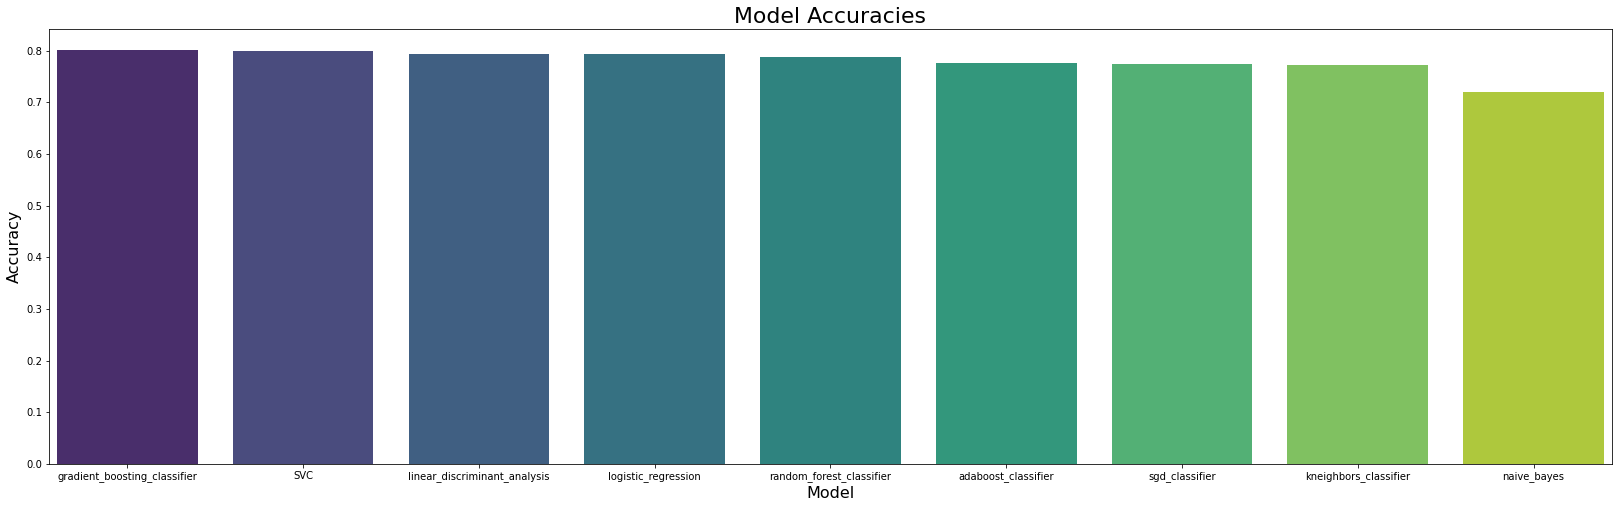

                          Model  Accuracy
7  gradient_boosting_classifier  0.801610
3                           SVC  0.799885
1  linear_discriminant_analysis  0.792984





                          Model  Accuracy
7  gradient_boosting_classifier  0.801610
3                           SVC  0.799885
1  linear_discriminant_analysis  0.792984
2           logistic_regression  0.792984
6      random_forest_classifier  0.787809
8           adaboost_classifier  0.775733
5                sgd_classifier  0.773433
4         kneighbors_classifier  0.771708
0                   naive_bayes  0.719954


In [430]:
visualize_model_accuracies(model_dict)

In [431]:
gs_model_dict = {}

### Grid Search Gradient Boosting Classifier

In [432]:
%%timeit
parameters_gbc = {
    'learning_rate': [0.1,0.125, 0.075],
    'n_estimators': [100, 105, 110],
    'max_depth': [3, 4, 5, 6, 7]
}

clf_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), parameters_gbc)
clf_gbc.fit(X_train, y_train)
y_pred_gbc = clf_gbc.predict(X_val)
accuracy_gbc = accuracy_score(y_val, y_pred_gbc)
gs_model_dict['gradient_boosting_classifier'] = accuracy_gbc
print(f'\n\n{accuracy_gbc}')



0.8113858539390454


### Grid Search Support Vector Classifier (SVC)

In [433]:
%%timeit
parameters_svc = {
    'C':[10, 100, 1000],
    'kernel':['rbf']}
clf_svc = gscv(SVC(random_state=42), parameters_svc)
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_val)
accuracy_svc = accuracy_score(y_val, y_pred_svc)
gs_model_dict['SVC'] = accuracy_svc
print(f'\n\n{accuracy_svc}')



0.7947096032202415


### Grid Search Linear discriminant analysis

In [437]:
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
grid['shrinkage'] = np.arange(0, 1, 0.01)
clf_lda = GridSearchCV(LinearDiscriminantAnalysis(), grid)
clf_lda.fit(X_train, y_train)
y_pred_lda = clf_lda.predict(X_val)
accuracy_lda = accuracy_score(y_val, y_pred_lda)
gs_model_dict['Linear discriminant analysis'] = accuracy_lda
print(f'\n\n{accuracy_lda}')



0.7699827487061529


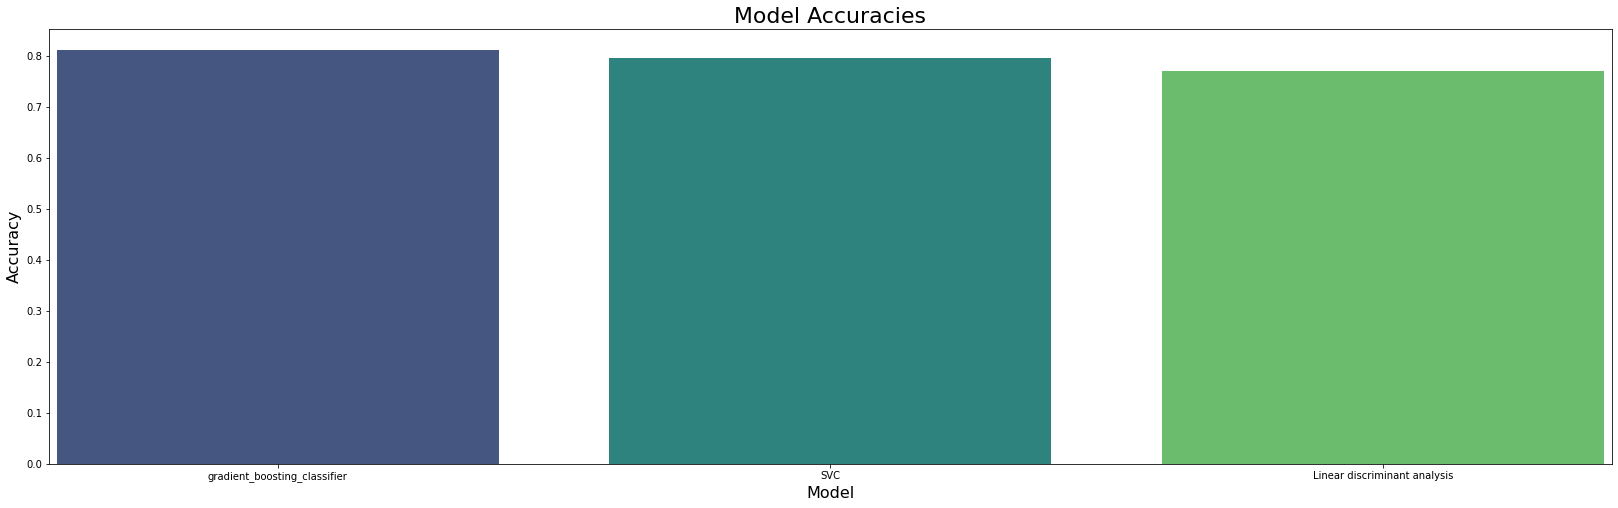

                          Model  Accuracy
0  gradient_boosting_classifier  0.811386
1                           SVC  0.794710
2  Linear discriminant analysis  0.769983





                          Model  Accuracy
0  gradient_boosting_classifier  0.811386
1                           SVC  0.794710
2  Linear discriminant analysis  0.769983


In [438]:
visualize_model_accuracies(gs_model_dict)